# Navigation: Training


## Start the Environment and set up agent

For more details see `README.md`.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import torch

In [2]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
from dqn_agent import Agent
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

agent = Agent(state_size=len(state), action_size=action_size, seed=0)

## Train agent

In [4]:
window_size = 100 # size of window to calculate mean final score
min_score = 13    # minimal score to stop training

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.95):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                                # list containing scores from each episode
    scores_window = deque(maxlen=window_size)  # last window_size scores
    eps = eps_start                            # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tEpsilon:{}'\
                      .format(i_episode, np.mean(scores_window), eps))
        if np.mean(scores_window) > min_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'\
                      .format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_fast_decay_13.pth')
            break
    return scores

In [5]:
scores = dqn()

Episode 100	Average Score: 2.22	Epsilon:0.01
Episode 200	Average Score: 7.90	Epsilon:0.01
Episode 300	Average Score: 12.35	Epsilon:0.01
Episode 317	Average Score: 13.07
Environment solved in 217 episodes!	Average Score: 13.07


In [6]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import pandas as pd

init_notebook_mode(connected=True)

In [10]:
data = [go.Scatter(x=np.arange(len(scores)), y=scores)]
layout = dict(
    title = 'Improvement of scores during trainig',
    xaxis = dict(title = 'Number of Episodes'),
    yaxis = dict(title = 'Score'),
)

fig = dict(data=data, layout=layout)
iplot(fig)

In [11]:
env.close()

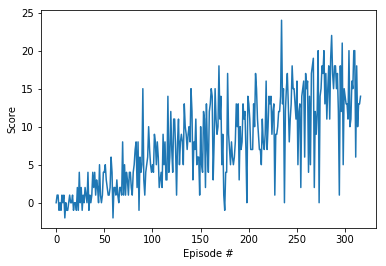

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()